In [455]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, OneHotEncoder
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.impute import SimpleImputer, KNNImputer
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

## Train Test Split

1. Pisahkan X (fitur prediktor) dan y (label) dari titanic  
2. Lakukan train test split (test size = 0.2, stratify = y) yang menghasilkan X_train, X_test, y_train, y_test  
3. Print .head(), type(), dan .shape dari masing-masing variabel  

In [382]:
titanic = pd.read_csv('titanic_new.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [383]:
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Parch', 'Ticket', 'Cabin'], axis=1)
y = titanic['Survived']

In [384]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=42)

In [385]:
for set in (X_train, X_test, y_train, y_test):
    print(set.head())
    print(type(set))
    print(set.shape)
    print('---')

      Pclass     Sex   Age  SibSp      Fare Embarked
1021       3    male  32.0      0    8.0500        S
318        1  female  31.0      0  164.8667        S
924        3  female   NaN      1   23.4500        S
652        3    male  21.0      0    8.4333        S
1189       1    male  30.0      0   45.5000        S
<class 'pandas.core.frame.DataFrame'>
(1047, 6)
---
      Pclass     Sex   Age  SibSp      Fare Embarked
950        1  female  36.0      0  262.3750        C
811        3    male  39.0      0   24.1500        S
475        1    male   NaN      0   52.0000        S
1136       1    male  41.0      1   51.8625        S
137        1    male  37.0      1   53.1000        S
<class 'pandas.core.frame.DataFrame'>
(262, 6)
---
1021    0
318     1
924     1
652     0
1189    0
Name: Survived, dtype: int64
<class 'pandas.core.series.Series'>
(1047,)
---
950     1
811     0
475     0
1136    0
137     0
Name: Survived, dtype: int64
<class 'pandas.core.series.Series'>
(262,)
---


In [386]:
y_train.value_counts(normalize=True)

0    0.622732
1    0.377268
Name: Survived, dtype: float64

In [387]:
y_test.value_counts(normalize=True)

0    0.622137
1    0.377863
Name: Survived, dtype: float64

In [388]:
X_train.isna().sum()

Pclass        0
Sex           0
Age         204
SibSp         0
Fare          0
Embarked      0
dtype: int64

In [389]:
X_test.isna().sum()

Pclass       0
Sex          0
Age         59
SibSp        0
Fare         1
Embarked     2
dtype: int64

1. Lakukan knn imputation untuk handling missing value di X_train  
2. Buktikan bahwa sudah tidak ada missing value dengan menggunakan .isna().sum()  

In [390]:
sex_embarked = X_train[['Sex', 'Embarked']]

In [391]:
ordinal_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
sex_embarked_encoded = ordinal_enc.fit_transform(sex_embarked)

In [392]:
X_train_imp = X_train.copy(deep=True)

In [393]:
sex_embarked_encoded

array([[1., 2.],
       [0., 2.],
       [0., 2.],
       ...,
       [1., 2.],
       [0., 2.],
       [1., 2.]])

In [394]:
X_train_imp['Sex'] = sex_embarked_encoded[:,0]
X_train_imp['Embarked'] = sex_embarked_encoded[:,1]
X_train_imp.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
1021,3,1.0,32.0,0,8.0500,2.0
318,1,0.0,31.0,0,164.8667,2.0
924,3,0.0,NaN,1,23.4500,2.0
652,3,1.0,21.0,0,8.4333,2.0
1189,1,1.0,30.0,0,45.5000,2.0


In [395]:
knn_imp = KNNImputer(n_neighbors=5)

In [396]:
X_train_imp = pd.DataFrame(knn_imp.fit_transform(X_train_imp), columns=knn_imp.feature_names_in_)

In [397]:
X_train_imp.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

In [398]:
X_train_imp.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3.0,1.0,32.0,0.0,8.0500,2.0
1,1.0,0.0,31.0,0.0,164.8667,2.0
2,3.0,0.0,22.2,1.0,23.4500,2.0
3,3.0,1.0,21.0,0.0,8.4333,2.0
4,1.0,1.0,30.0,0.0,45.5000,2.0


In [399]:
sex_embarked_imp = X_train_imp[['Sex', 'Embarked']]

In [400]:
sex_embarked_imp['Sex'].unique()

array([1., 0.])

In [401]:
sex_embarked_imp['Embarked'].unique()

array([2., 1., 0.])

In [402]:
sex_embarked_inv = ordinal_enc.inverse_transform(sex_embarked_imp)

In [403]:
X_train_imp['Sex'] = sex_embarked_inv[:,0]
X_train_imp['Embarked'] = sex_embarked_inv[:,1]

In [404]:
X_train_imp.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3.0,male,32.0,0.0,8.0500,S
1,1.0,female,31.0,0.0,164.8667,S
2,3.0,female,22.2,1.0,23.4500,S
3,3.0,male,21.0,0.0,8.4333,S
4,1.0,male,30.0,0.0,45.5000,S


## Feature Engineering

### Standard Scaling

In [405]:
dum = np.random.randint(1, 6, 10)
dum.shape

(10,)

In [406]:
dum2 = dum.reshape(-1, 1)
dum2.shape

(10, 1)

In [407]:
ss = StandardScaler()

In [408]:
dum2_ss = ss.fit_transform(dum2)

In [409]:
dum2_ss.mean()

-1.554312234475219e-16

In [410]:
dum2_ss.std()

1.0

### MinMax Scaling

In [411]:
mm = MinMaxScaler()

In [412]:
dum2_mm = mm.fit_transform(dum2)
dum2_mm

array([[1.  ],
       [0.25],
       [0.5 ],
       [0.25],
       [0.5 ],
       [0.5 ],
       [0.75],
       [1.  ],
       [0.75],
       [0.  ]])

In [413]:
dum2_mm.min()

0.0

In [414]:
dum2_mm.max()

1.0

### MaxAbs Scaling

In [415]:
maxabs = MaxAbsScaler()

In [416]:
dum2_maxabs = maxabs.fit_transform(dum2)
dum2_maxabs

array([[1. ],
       [0.4],
       [0.6],
       [0.4],
       [0.6],
       [0.6],
       [0.8],
       [1. ],
       [0.8],
       [0.2]])

In [417]:
np.max(np.abs(dum2))

5

In [418]:
dum2/np.max(np.abs(dum2))

array([[1. ],
       [0.4],
       [0.6],
       [0.4],
       [0.6],
       [0.6],
       [0.8],
       [1. ],
       [0.8],
       [0.2]])

### Robust Scaling

In [419]:
robust = RobustScaler()

In [420]:
dum2_robust = robust.fit_transform(dum2)
dum2_robust

array([[ 1.14285714],
       [-0.57142857],
       [ 0.        ],
       [-0.57142857],
       [ 0.        ],
       [ 0.        ],
       [ 0.57142857],
       [ 1.14285714],
       [ 0.57142857],
       [-1.14285714]])

In [421]:
dum2

array([[5],
       [2],
       [3],
       [2],
       [3],
       [3],
       [4],
       [5],
       [4],
       [1]])

In [422]:
for n in [25, 50, 75]:
    print(np.percentile(dum2, n))

2.25
3.0
4.0


In [423]:
(dum2 - 3)/(3.75 - 2)

array([[ 1.14285714],
       [-0.57142857],
       [ 0.        ],
       [-0.57142857],
       [ 0.        ],
       [ 0.        ],
       [ 0.57142857],
       [ 1.14285714],
       [ 0.57142857],
       [-1.14285714]])

1. Buat array random berisi 10 integer, print array  
2. Lakukan standar scaling, hitung mean dan std pra dan paska scaling, print array hasil scaling  
3. Lakukan min max scaling, hitung min dan max pra dan paska scaling, print array hasil scaling  
4. Lakukan max abs scaling, hitung max(|x|) yang akan dijadikan penyebut, print array hasil scaling  
5. Lakukan robust scaling, hitung q1, q2, q3 yang dijadikan parameter pada scaler, print array hasil scaling  

In [424]:
dum3 = np.random.randint(1, 8, 10)
dum3

array([5, 3, 5, 5, 5, 4, 6, 2, 4, 7])

In [425]:
dum4 = dum3.reshape(-1, 1)
dum4

array([[5],
       [3],
       [5],
       [5],
       [5],
       [4],
       [6],
       [2],
       [4],
       [7]])

In [426]:
dum4_ss = ss.fit_transform(dum4)
dum4_ss

array([[ 0.29488391],
       [-1.17953565],
       [ 0.29488391],
       [ 0.29488391],
       [ 0.29488391],
       [-0.44232587],
       [ 1.03209369],
       [-1.91674543],
       [-0.44232587],
       [ 1.76930347]])

In [427]:
print('--Before Scaling--')
print('Mean: ', dum4.mean())
print('Std: ', dum4.std())
print('================')
print('--After Scaling--')
print('Mean: ', dum4_ss.mean())
print('Std: ', dum4_ss.std())

--Before Scaling--
Mean:  4.6
Std:  1.3564659966250536
--After Scaling--
Mean:  2.6645352591003756e-16
Std:  1.0


In [428]:
dum4_mm = mm.fit_transform(dum4)
dum4_mm

array([[0.6],
       [0.2],
       [0.6],
       [0.6],
       [0.6],
       [0.4],
       [0.8],
       [0. ],
       [0.4],
       [1. ]])

In [429]:
print('--Before Scaling--')
print('Min: ', dum4.max())
print('Min: ', dum4.min())
print('================')
print('--After Scaling--')
print('Min: ', dum4_mm.min())
print('Max: ', dum4_mm.max())

--Before Scaling--
Min:  7
Min:  2
--After Scaling--
Min:  0.0
Max:  1.0


In [430]:
dum4_maxabs = maxabs.fit_transform(dum4)
dum4_maxabs

array([[0.71428571],
       [0.42857143],
       [0.71428571],
       [0.71428571],
       [0.71428571],
       [0.57142857],
       [0.85714286],
       [0.28571429],
       [0.57142857],
       [1.        ]])

In [431]:
np.abs(dum4).max()

7

In [432]:
dum4/np.max(np.abs(dum4))

array([[0.71428571],
       [0.42857143],
       [0.71428571],
       [0.71428571],
       [0.71428571],
       [0.57142857],
       [0.85714286],
       [0.28571429],
       [0.57142857],
       [1.        ]])

1. Pilih satu scaler  
2. Lakukan scaling pada X_train (paska imputasi) kolom numerik  
3. Print dataframe before and after  
4. Print .describe() before and after  

In [433]:
X_train_imp.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3.0,male,32.0,0.0,8.0500,S
1,1.0,female,31.0,0.0,164.8667,S
2,3.0,female,22.2,1.0,23.4500,S
3,3.0,male,21.0,0.0,8.4333,S
4,1.0,male,30.0,0.0,45.5000,S


In [434]:
X_train_imp_num = X_train_imp.select_dtypes('number')
X_train_imp_cat = X_train_imp.select_dtypes('object')

In [435]:
X_train_imp_num.head()

,Pclass,Age,SibSp,Fare
0,3.0,32.0,0.0,8.0500
1,1.0,31.0,0.0,164.8667
2,3.0,22.2,1.0,23.4500
3,3.0,21.0,0.0,8.4333
4,1.0,30.0,0.0,45.5000


In [436]:
X_train_imp_num_scaled = pd.DataFrame(ss.fit_transform(X_train_imp_num), columns=ss.feature_names_in_)
X_train_imp_num_scaled

,Pclass,Age,SibSp,Fare
0,0.839462,0.156423,-0.473502,-0.473468
1,-1.561949,0.080740,-0.473502,2.452481
2,0.839462,-0.585271,0.516032,-0.186128
3,0.839462,-0.676090,-0.473502,-0.466316
4,-1.561949,0.005057,-0.473502,0.225289
...,...,...,...,...
1042,-1.561949,2.124182,-0.473502,2.239697
1043,-1.561949,2.275548,0.516032,4.283491
1044,0.839462,0.459155,-0.473502,-0.483808
1045,-0.361244,1.140303,-0.473502,-0.063916


In [437]:
print('--- Before Scaling ---')
print(X_train_imp_num.head())
print('--- After Scaling ---')
print(X_train_imp_num_scaled.head())

--- Before Scaling ---
   Pclass   Age  SibSp      Fare
0     3.0  32.0    0.0    8.0500
1     1.0  31.0    0.0  164.8667
2     3.0  22.2    1.0   23.4500
3     3.0  21.0    0.0    8.4333
4     1.0  30.0    0.0   45.5000
--- After Scaling ---
     Pclass       Age     SibSp      Fare
0  0.839462  0.156423 -0.473502 -0.473468
1 -1.561949  0.080740 -0.473502  2.452481
2  0.839462 -0.585271  0.516032 -0.186128
3  0.839462 -0.676090 -0.473502 -0.466316
4 -1.561949  0.005057 -0.473502  0.225289


In [438]:
print('--- Before Scaling ---')
print(X_train_imp_num.describe())
print('--- After Scaling ---')
print(X_train_imp_num_scaled.describe())

--- Before Scaling ---
            Pclass          Age       SibSp         Fare
count  1047.000000  1047.000000  1047.00000  1047.000000
mean      2.300860    29.933181     0.47851    33.425573
std       0.833242    13.219313     1.01106    53.620784
min       1.000000     0.170000     0.00000     0.000000
25%       2.000000    22.000000     0.00000     7.895800
50%       3.000000    28.000000     0.00000    13.858300
75%       3.000000    38.000000     1.00000    30.695800
max       3.000000    80.000000     8.00000   512.329200
--- After Scaling ---
             Pclass           Age         SibSp          Fare
count  1.047000e+03  1.047000e+03  1.047000e+03  1.047000e+03
mean  -7.804433e-17 -1.883244e-16 -2.035939e-17 -7.295448e-17
std    1.000478e+00  1.000478e+00  1.000478e+00  1.000478e+00
min   -1.561949e+00 -2.252568e+00 -4.735016e-01 -6.236676e-01
25%   -3.612438e-01 -6.004073e-01 -4.735016e-01 -4.763446e-01
50%    8.394617e-01 -1.463090e-01 -4.735016e-01 -3.650940e-01
75%    8

### One Hot Encoding

In [439]:
warna = ['merah', 'kuning', 'biru']
nama = ['nisa', 'budi', 'arwan']

dum_df = pd.DataFrame({'warna': warna, 'nama': nama})

In [440]:
dum_df

,warna,nama
0,merah,nisa
1,kuning,budi
2,biru,arwan


In [441]:
ohe = OneHotEncoder(handle_unknown='ignore')
pd.DataFrame(ohe.fit_transform(dum_df[['warna']]).toarray(), columns=ohe.get_feature_names_out(['warna']))

,warna_biru,warna_kuning,warna_merah
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0


1. Pada kolom kategorikal X_train lakukan one hot encoding  
2. Print dataframe hasil one hot encoding  
3. Gabungkan X_train numerik dan X_train kategorik dengan menggunakan concat  
4. Print hasil penggabungan X_train paska transformasi  

In [442]:
X_train_imp_cat

,Sex,Embarked
0,male,S
1,female,S
2,female,S
3,male,S
4,male,S
...,...,...
1042,female,S
1043,female,S
1044,male,S
1045,female,S


In [443]:
X_train_imp_cat_ohe = pd.DataFrame(ohe.fit_transform(X_train_imp_cat).toarray(), columns=ohe.get_feature_names_out(X_train_imp_cat.columns))

In [444]:
X_train_imp_cat_ohe.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [445]:
X_train_transformed = pd.concat([X_train_imp_num_scaled, X_train_imp_cat_ohe], axis=1)

In [446]:
X_train_transformed.head()

,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.839462,0.156423,-0.473502,-0.473468,0.0,1.0,0.0,0.0,1.0
1,-1.561949,0.080740,-0.473502,2.452481,1.0,0.0,0.0,0.0,1.0
2,0.839462,-0.585271,0.516032,-0.186128,1.0,0.0,0.0,0.0,1.0
3,0.839462,-0.676090,-0.473502,-0.466316,0.0,1.0,0.0,0.0,1.0
4,-1.561949,0.005057,-0.473502,0.225289,0.0,1.0,0.0,0.0,1.0


In [447]:
X_train_transformed.shape

(1047, 9)

In [448]:
X_train.shape

(1047, 6)

## Feature Selection

### Multicolinearity Reduction

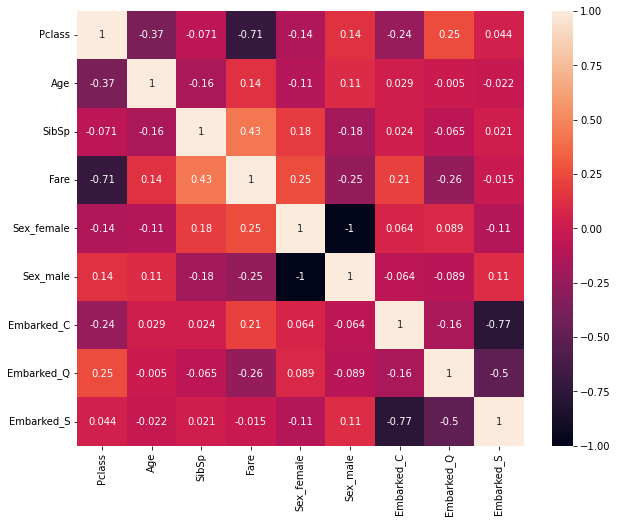

In [449]:
plt.figure(figsize=(10,8))
sns.heatmap(X_train_transformed.corr(method='spearman'), annot=True, vmax=1, vmin=-1)
plt.show()

1. Lakukan feature selection metode multicolinearity reduction  
2. Identifikasi pasangan fitur yang koefisien korelasi spearmannya < -0.8, > 0.8  
3. Masukkan salah satu dari pasangan tersebut ke dalam list  
4. Drop kolomyang ada di list  

In [450]:
feature_comb = itertools.combinations(X_train_transformed.columns, 2)
list(feature_comb)

[('Pclass', 'Age'),
 ('Pclass', 'SibSp'),
 ('Pclass', 'Fare'),
 ('Pclass', 'Sex_female'),
 ('Pclass', 'Sex_male'),
 ('Pclass', 'Embarked_C'),
 ('Pclass', 'Embarked_Q'),
 ('Pclass', 'Embarked_S'),
 ('Age', 'SibSp'),
 ('Age', 'Fare'),
 ('Age', 'Sex_female'),
 ('Age', 'Sex_male'),
 ('Age', 'Embarked_C'),
 ('Age', 'Embarked_Q'),
 ('Age', 'Embarked_S'),
 ('SibSp', 'Fare'),
 ('SibSp', 'Sex_female'),
 ('SibSp', 'Sex_male'),
 ('SibSp', 'Embarked_C'),
 ('SibSp', 'Embarked_Q'),
 ('SibSp', 'Embarked_S'),
 ('Fare', 'Sex_female'),
 ('Fare', 'Sex_male'),
 ('Fare', 'Embarked_C'),
 ('Fare', 'Embarked_Q'),
 ('Fare', 'Embarked_S'),
 ('Sex_female', 'Sex_male'),
 ('Sex_female', 'Embarked_C'),
 ('Sex_female', 'Embarked_Q'),
 ('Sex_female', 'Embarked_S'),
 ('Sex_male', 'Embarked_C'),
 ('Sex_male', 'Embarked_Q'),
 ('Sex_male', 'Embarked_S'),
 ('Embarked_C', 'Embarked_Q'),
 ('Embarked_C', 'Embarked_S'),
 ('Embarked_Q', 'Embarked_S')]

In [451]:
drop = []
for a, b in feature_comb:
    coef, pvalue = spearmanr(X_train_transformed[a], X_train_transformed[b])
    if pvalue < 0.05:
        if coef > 0.8:
            drop.append(b)
        elif coef < -0.8:
            drop.append(b)

drop

[]

In [452]:
X_train_sel = X_train_transformed.drop(columns=drop, axis=1)

In [453]:
X_train_sel.head()

,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.839462,0.156423,-0.473502,-0.473468,0.0,1.0,0.0,0.0,1.0
1,-1.561949,0.080740,-0.473502,2.452481,1.0,0.0,0.0,0.0,1.0
2,0.839462,-0.585271,0.516032,-0.186128,1.0,0.0,0.0,0.0,1.0
3,0.839462,-0.676090,-0.473502,-0.466316,0.0,1.0,0.0,0.0,1.0
4,-1.561949,0.005057,-0.473502,0.225289,0.0,1.0,0.0,0.0,1.0


### Mutual Information

In [454]:
y_train

1021    0
318     1
924     1
652     0
1189    0
       ..
268     1
960     1
663     0
1132    1
108     0
Name: Survived, Length: 1047, dtype: int64

In [456]:
mi = mutual_info_classif(X_train_sel, y_train, random_state=42)
pd.DataFrame({'features': X_train_sel.columns, 'mi': mi}).sort_values('mi', ascending=False)

,features,mi
4,Sex_female,0.251124
5,Sex_male,0.240235
3,Fare,0.101735
2,SibSp,0.044566
1,Age,0.041843
0,Pclass,0.029211
8,Embarked_S,0.008682
7,Embarked_Q,0.004546
6,Embarked_C,0.000000


In [457]:
np.random.seed(42)
kbest = SelectKBest(score_func=mutual_info_classif, k=7)

In [458]:
kbest.fit(X_train_sel, y_train)

SelectKBest(k=7, score_func=<function mutual_info_classif at 0x7f4d69842040>)

In [459]:
kbest.get_support()

array([ True,  True,  True,  True,  True,  True, False, False,  True])

In [460]:
X_train_sel.columns[kbest.get_support()]

Index(['Pclass', 'Age', 'SibSp', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_S'],
      dtype='object')

In [461]:
kbest.scores_

array([0.02921097, 0.04184324, 0.04456618, 0.10173502, 0.25112402,
       0.24023477, 0.        , 0.00454588, 0.00868195])

In [462]:
mi = mutual_info_classif(X_train_sel, y_train, random_state=42)
pd.DataFrame({'features': X_train_sel.columns, 'mi': mi, 'kbest': kbest.scores_}).sort_values('mi', ascending=False)

,features,mi,kbest
4,Sex_female,0.251124,0.251124
5,Sex_male,0.240235,0.240235
3,Fare,0.101735,0.101735
2,SibSp,0.044566,0.044566
1,Age,0.041843,0.041843
0,Pclass,0.029211,0.029211
8,Embarked_S,0.008682,0.008682
7,Embarked_Q,0.004546,0.004546
6,Embarked_C,0.000000,0.000000
